# If using Google Colab

In [142]:
!git clone https://github.com/jorisbc/EEIST_complexity

fatal: destination path 'EEIST_complexity' already exists and is not an empty directory.


In [143]:
!ls EEIST_complexity

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Main

In [144]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [145]:
#if on google colab:
df = pd.read_csv('EEIST_complexity/country_product_export_2019.zip', index_col=None)
# if on local machine:
#df = pd.read_csv('country_product_export_2019.zip', index_col=None)
df.head()

,name_country,country_code,product_code,name_product,export_value
0,Argentina,ARG,10111,"Horses; live, pure-bred breeding animals",5458.449
1,Argentina,ARG,10119,"Horses; live, other than pure-bred breeding animals",24615.609
2,Argentina,ARG,10210,"Bovine animals; live, pure-bred breeding animals",1089.205
3,Argentina,ARG,10290,"Bovine animals; live, other than pure-bred breeding animals",11.714
4,Argentina,ARG,10392,"Swine; live, (other than pure-bred breeding animals), weighing 50kg or more",34.230


In [146]:
pivot = df.pivot_table(columns='name_country', index='name_product', values='export_value', aggfunc=np.mean, fill_value=0)
pivot.tail()

name_country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe
name_product,,,,,,,,,,,,,,,,,,,,,
"Zinc; unwrought, alloys",0.0,0.000,0.0,0.0,0.0,0.006,0.0,0.0,7.320,0.0,...,0.000,0.00,0.0,0.0,111.035,1444.125,0.0,0.000,32.573,0.0
Zinc; waste and scrap,0.0,249.917,0.0,0.0,0.0,93.102,0.0,0.0,43.179,0.0,...,116.016,61.15,0.0,0.0,989.813,2802.846,0.0,288.614,0.000,0.0
Zirconium ores and concentrates,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,...,0.000,0.00,0.0,0.0,0.000,5078.145,0.0,85.889,0.000,0.0
"Zirconium; other than unwrought, n.e.s. in heading no. 8109",0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,28.472,0.0,...,0.000,0.00,0.0,0.0,0.000,0.127,0.0,0.000,0.000,0.0
"Zirconium; unwrought, waste and scrap, powders",0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.143,0.0,...,0.000,0.00,0.0,0.0,0.000,53.657,0.0,0.000,0.000,0.0


In [147]:
pivot[pivot.index.str.contains('Cocoa', case=False)]

name_country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe
name_product,,,,,,,,,,,,,,,,,,,,,
"Chocolate & other food preparations containing cocoa; in blocks, slabs or bars weighing more than 2kg or in liquid, paste, powder, granular or other bulk form in containers or immediate packings, content exceeding 2kg",0.000,0.073,0.024,2.444,0.255,0.000,0.000,0.000,8321.041,8.030,...,0.464,27.568,45.244,0.000,229.310,2172.361,0.0,0.000,38.832,15.073
"Chocolate and other food preparations containing cocoa; in blocks, slabs or bars, (not filled), weighing 2kg or less",0.000,139.310,309.091,0.000,0.000,0.000,0.000,0.706,6891.399,401.128,...,0.777,59.501,550.290,7.976,170.738,6486.347,0.0,0.000,14.139,10.967
"Chocolate and other food preparations containing cocoa; in blocks, slabs or bars, filled, weighing 2kg or less",0.000,129.333,92.256,0.000,0.000,0.000,0.000,7.770,2275.419,340.159,...,153.469,10.393,185.364,0.000,3.041,609.335,0.0,0.000,0.000,23.338
Chocolate and other food preparations containing cocoa; n.e.s. in chapter 18,0.141,243.478,846.948,7.325,0.071,5.186,0.038,19.845,74668.134,17379.221,...,0.132,1570.879,6255.785,0.000,648.246,13126.544,0.0,0.000,2129.624,35.548
"Cocoa beans; whole or broken, raw or roasted",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,133.129,13.461,...,24233.873,83.033,0.000,4324.091,43330.943,5212.605,0.0,0.000,0.000,0.000
"Cocoa; butter, fat and oil",0.000,0.000,12007.560,0.000,0.000,0.000,0.000,0.000,2.272,11.213,...,0.320,3.155,0.000,0.000,4835.981,26.948,0.0,0.000,0.000,0.000
"Cocoa; paste, not defatted",0.000,0.000,68.249,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,260.026,646.516,0.0,0.000,0.000,0.000
"Cocoa; paste, wholly or partly defatted",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.173,2.531,...,0.000,0.000,0.000,0.000,0.026,0.000,0.0,0.000,0.000,0.000
"Cocoa; powder, containing added sugar or other sweetening matter",0.000,0.020,0.529,7.874,0.000,2.192,0.000,0.000,621.664,1.053,...,0.147,2.838,0.000,0.000,2.992,371.072,0.0,0.000,64.641,0.018


<Axes: xlabel='name_country'>

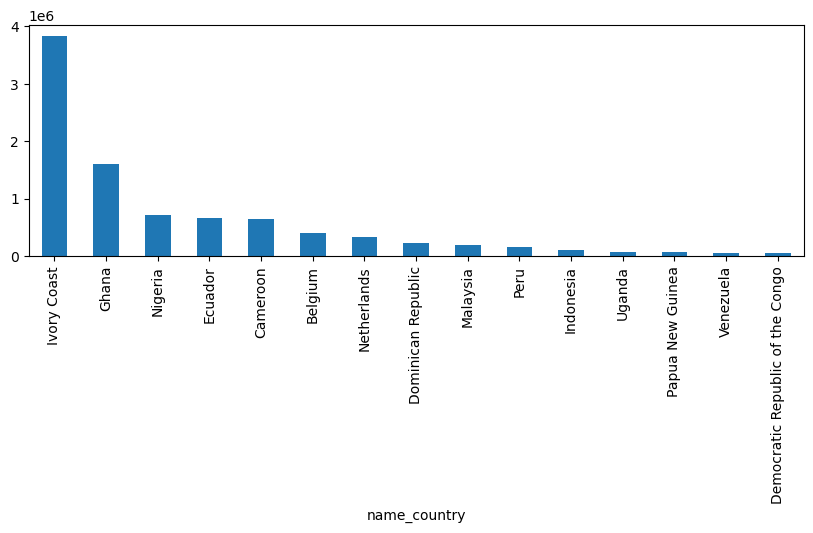

In [148]:
pivot.loc['Cocoa beans; whole or broken, raw or roasted', :].sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10, 3))

# Create M matrix

$$\text{RCA}_{cp} = \frac{x_{cp} / x_p}{x_c / x}$$

$$ M_{cp} = \text{RCA}_{cp} > 1$$

In [149]:
x_product = pivot.sum()
x_country = pivot.sum(axis=1)
x = pivot.sum().sum()

In [150]:
rca = (pivot / x_product).div(x_country / x, axis=0)

In [151]:
rca.loc[:, rca.columns.str.contains('france', case=False)]

name_country,"France, Monaco"
name_product,
"Abrasive powder or grain; natural or artificial, on a base of materials n.e.s. in heading no. 6805, whether or not cut to shape or sewn or otherwise made up",1.118842
"Abrasive powder or grain; natural or artificial, on a base of paper or paperboard only, whether or not cut to shape or sewn or otherwise made up",0.644370
"Abrasive powder or grain; natural or artificial, on a base of woven textile fabric only, whether or not cut to shape or sewn or otherwise made up",0.593045
"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrosated derivatives",0.655984
Acid oils from refining,0.063592
...,...
"Zinc; unwrought, alloys",0.296440
Zinc; waste and scrap,5.488204
Zirconium ores and concentrates,0.223249


<Axes: ylabel='name_product'>

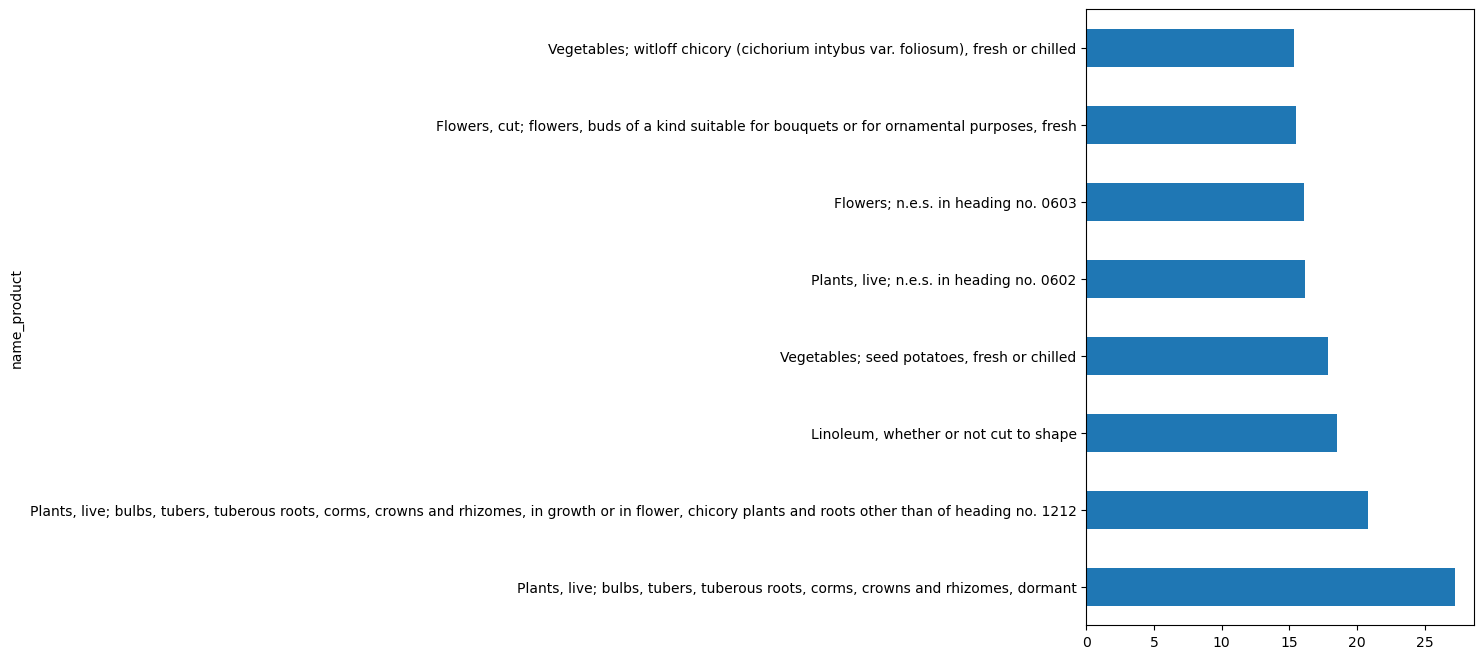

In [152]:
rca['Netherlands'].sort_values(ascending=False).head(8).plot(kind='barh', figsize=(5, 8))

In [153]:
M = np.heaviside(rca - 1, 0)

## Create product space adjacency matrix

between i and j at time t: 
$$ \phi_{i,j} = \min\left[ P(RCAx_{i} | RCAx{j}), P(RCAx_{j} | RCAx{i}) \right]$$

, where, empirically:

$$ P(RCAx_{i} | RCAx_{j}) = \frac{\# (RCAx_{i} \& RCAx_{j})}{\# RCA_{j}} $$

So, using M, we have

$$P(RCAx_{p} | RCAx_{p'})  = \frac{\sum_c M_{cp} * M_{cp'} }{ \sum_c M_{cp'} }$$

In [154]:
P_RCA = M.dot(M.transpose()) / np.diag(M.dot(M.transpose()))

phi = pd.concat([P_RCA, P_RCA.transpose()]).groupby(level=0).min()

In [155]:
# make list
phi_list = phi.stack()
phi_list.sort_values(ascending=False, inplace=True)

# remove diagonal
phi_list = phi_list[phi_list.index.get_level_values(0) != phi_list.index.get_level_values(1)]

# rename multiindex
phi_list.index.names = ['product1', 'product2']
phi_list.name = 'phi'
phi_list = phi_list.to_frame()

In [156]:
pd.set_option('display.max_colwidth', 700)
phi_list.reset_index()

,product1,product2,phi
0,Cereal pellets; of cereals other than wheat,"Mosses and lichens; of a kind suitable for bouquets or ornamental purposes, fresh, dried, dyed, bleached, impregnated or otherwise prepared",1.0
1,Cereal pellets; of cereals other than wheat,"Asbestos-cement, cellulose fibre-cement articles or the like; tubes, pipes and tube or pipe fittings",1.0
2,Cereal pellets; of cereals other than wheat,"Photographic film; for colour photography (polychrome), in rolls, sensitised, unexposed, of a width not exceeding 16mm and of a length not exceeding 14m",1.0
3,Cereal pellets; of cereals other than wheat,"Projectors, image; slide (excluding cinematographic)",1.0
4,Cereal pellets; of cereals other than wheat,Spices; caraway seeds,1.0
...,...,...,...
21599251,"Fibres; artificial staple fibres, of viscose, not carded, combed or otherwise processed for spinning","Clays (excluding expanded clays of heading no. 6806); andalusite, kyanite and sillimanite, whether or not calcined",0.0
21599252,"Seats; swivel with variable height adjustment, excluding medical, surgical, dental, veterinary or barber furniture","Oils, essential; concentrates in fats, fixed oils, waxes and the like, terpenic by-products, aqueous distillates and solutions",0.0
21599253,"Seats; swivel with variable height adjustment, excluding medical, surgical, dental, veterinary or barber furniture","Oils, essential; of lemon (terpeneless or not), including concretes and absolutes",0.0
21599254,"Seats; swivel with variable height adjustment, excluding medical, surgical, dental, veterinary or barber furniture","Oils, essential; of mints (excluding peppermint), terpeneless or not, including concretes and absolutes",0.0


In [157]:
display(phi_list[75:100])

,,phi
product1,product2,
"Skirts and divided skirts; women's or girls', of synthetic fibres (not knitted or crocheted)","Blouses, shirts and shirt-blouses; women's or girls', of man-made fibres (not knitted or crocheted)",0.815789
"Blouses, shirts and shirt-blouses; women's or girls', of man-made fibres (not knitted or crocheted)","Skirts and divided skirts; women's or girls', of synthetic fibres (not knitted or crocheted)",0.815789
"Trousers, bib and brace overalls, breeches and shorts; women's or girls', of synthetic fibres, knitted or crocheted","Jerseys, pullovers, cardigans, waistcoats and similar articles; of man-made fibres, knitted or crocheted",0.815789
"Skirts and divided skirts; women's or girls', of textile materials n.e.s. in item no. 6204.5 (not knitted or crocheted)","Dresses; women's or girls', of cotton (not knitted or crocheted)",0.813953
"Dresses; women's or girls', of cotton (not knitted or crocheted)","Skirts and divided skirts; women's or girls', of textile materials n.e.s. in item no. 6204.5 (not knitted or crocheted)",0.813953
"Vehicles; parts, drive-axles with differential, whether or not provided with other transmission components","Pumps; fuel, lubricating or cooling medium pumps for internal combustion piston engines",0.812500
"Jackets and blazers; women's or girls', of cotton (not knitted or crocheted)","Coats; women's or girls', overcoats, raincoats, car-coats, capes, cloaks and similar articles, of cotton, other than those of heading no. 6204 (not knitted or crocheted)",0.812500
"Offal, edible; of swine, (other than livers), frozen","Meat; of swine, hams, shoulders and cuts thereof, with bone in, frozen",0.812500
"Pumps; fuel, lubricating or cooling medium pumps for internal combustion piston engines","Vehicles; parts, drive-axles with differential, whether or not provided with other transmission components",0.812500


In [158]:
# Phi can be used to create a network of products: the product space

In [159]:
G = nx.from_pandas_edgelist(phi_list.reset_index()[:10000], source='product1', target='product2', edge_attr='phi')

In [160]:
# calculate minimum spanning tree (keep everything connected but only via the strongest connections)

# set phi to -phi
for u, v, d in G.edges(data=True):
    d['phi'] = -d['phi']

# get maximum spanning tree
T = nx.maximum_spanning_tree(G, weight='phi')

# set phi to -phi
for u, v, d in T.edges(data=True):
    d['phi'] = -d['phi']

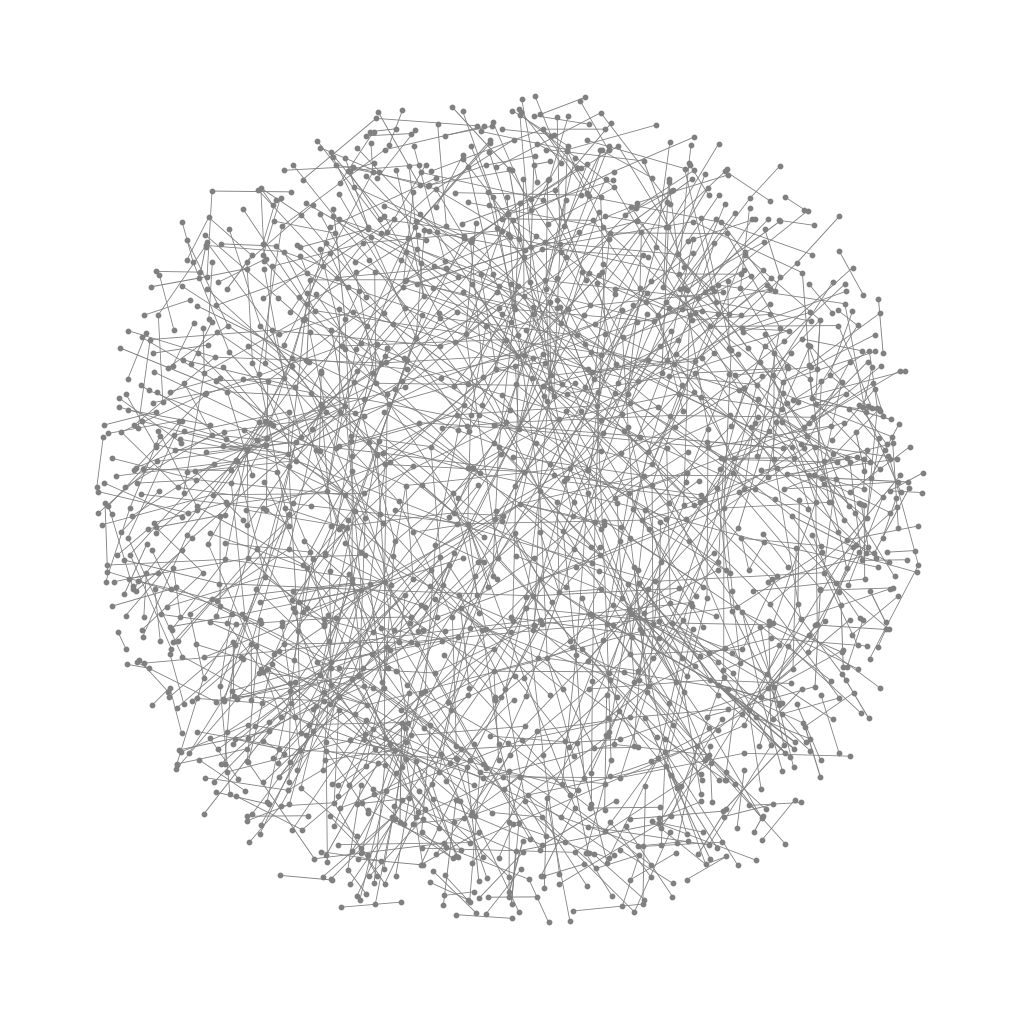

In [161]:
# draw 'product space' network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(T, k=0.1, weight='phi')

edge_width = [1*d['phi'] for (u, v, d) in T.edges(data=True)]

nx.draw(T, pos, node_size=10, width=edge_width, edge_color='grey', node_color='grey', with_labels=False)

# Country - product density

$$ d^c_j = \frac{\sum_i M_{ci} \phi_{ij}}{\sum_i \phi_{ij}} $$

In [162]:
country = 'United Kingdom'

In [163]:
competitive_products = M[M[country] == 1].index

In [164]:
competitive_products

Index(['Abrasive powder or grain; natural or artificial, on a base of materials n.e.s. in heading no. 6805, whether or not cut to shape or sewn or otherwise made up',
       'Abrasive powder or grain; natural or artificial, on a base of paper or paperboard only, whether or not cut to shape or sewn or otherwise made up',
       'Acids; acyclic polycarboxylic acids; n.e.s. in item no. 2917.1',
       'Acids; aromatic monocarboxylic acids, benzoic acid, its salts and esters',
       'Acids; carboxylic acids, (with phenol function but without other oxygen function), other esters of salicylic acid and its salts n.e.s. in item no. 2918.2',
       'Acids; carboxylic acids, with additional oxygen function and their anhydrides, halides, peroxides and peroxyacids, n.e.s. in heading no. 2918',
       'Acids; cyclanic, cyclenic or cycloterpenic monocarboxylic acids, their anhydrides, halides, peroxides, peroxyacids and their derivatives',
       'Acids; saturated acyclic monocarboxylic acids; acet

In [165]:
proximity_to_country = pd.DataFrame(index=phi.index, columns=['proximity'])

In [166]:
proximity_to_country

,proximity
name_product,
"Abrasive powder or grain; natural or artificial, on a base of materials n.e.s. in heading no. 6805, whether or not cut to shape or sewn or otherwise made up",NaN
"Abrasive powder or grain; natural or artificial, on a base of paper or paperboard only, whether or not cut to shape or sewn or otherwise made up",NaN
"Abrasive powder or grain; natural or artificial, on a base of woven textile fabric only, whether or not cut to shape or sewn or otherwise made up",NaN
"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrosated derivatives",NaN
Acid oils from refining,NaN
...,...
"Zinc; unwrought, alloys",NaN
Zinc; waste and scrap,NaN
Zirconium ores and concentrates,NaN


In [167]:
def calc_proximity(prod, competitive_products, phi):
    proximity = phi.loc[prod, competitive_products].sum() / phi.loc[prod, :].sum()
    return proximity

In [168]:
for product in proximity_to_country.index:
    proximity_to_country.loc[product, 'proximity'] = calc_proximity(product, competitive_products, phi)

In [169]:
proximity_to_country.sort_values(by='proximity', ascending=False, inplace=True)

In [170]:
proximity_to_country

,proximity
name_product,
"Meat; of sheep (including lamb), cuts with bone in (excluding carcasses and half-carcasses), fresh or chilled",0.596082
"Diamonds; whether or not worked, but not mounted or set, unsorted",0.538228
Heterocyclic compounds; lactams; other than 6-hexanelactam (epsilon caprolactam),0.519061
Anti-knock preparations; based on lead compounds,0.518209
Spices; fennel or juniper seeds,0.508563
...,...
"Amino-naphthols and other amino-phenols; their ethers and esters, (other than those containing more than one kind of oxygen function), aminohydroxynaphthalenesulphonic acids and their salts",0.17897
Monophenols; naphthols and their salts,0.177568
"Ties, bow ties and cravats; of man-made fibres (not knitted or crocheted)",0.177185


In [171]:
# if google colab
import EEIST_complexity.complexity as complexity

In [172]:
# if on local machine
import complexity

In [173]:
M, eci, eci_list, pci, pci_list = complexity.pivot_to_eci_pci(pivot)

In [174]:
proximity_to_country = proximity_to_country.loc[pivot.index]

In [175]:
proximity_to_country['pci'] = -pci

In [176]:
proximity_to_country.sort_values('pci', ascending=False)

,proximity,pci
name_product,,
"Rubber; synthetic, chloroprene (chlorobutadiene) rubber (CR), latex, in primary forms or in plates, sheets or strip",0.286471,3.194354
"Optical elements; polarising material, sheets and plates thereof",0.229763,2.929254
"Plastics; plates, sheets, film, foil and strip, of cellulose acetate, non-cellular and not reinforced, laminated, supported or similarly combined with other materials",0.229763,2.929254
"Photographic plates and film; exposed and developed, (other than cinematographic film, microfilm or that for offset reproduction)",0.28582,2.563028
Surveying equipment; theodolites and tacheometers,0.309101,2.517715
...,...,...
"Rubber; natural (excluding latex, technically specified natural rubber and smoked sheets), in primary forms or in plates, sheets or strip",0.211417,-3.182304
"Ground-nuts; shelled, not roasted or otherwise cooked, whether or not broken",0.258148,-3.210512
"Oil seeds; sesamum seeds, whether or not broken",0.245318,-3.391114


In [177]:
proximity_to_country['rca'] = rca[country]

In [178]:
proximity_to_country.sort_values('rca', ascending=False)

,proximity,pci,rca
name_product,,,
Anti-knock preparations; based on lead compounds,0.518209,-0.082325,27.726557
Gin and geneva,0.385522,-0.542897,25.005143
Whiskies,0.427578,-0.557377,22.008196
"Wood; railway or tramway sleepers (cross-ties), not impregnated",0.388485,-0.608514,21.115009
"Tools, hand; forks",0.395895,0.196869,19.555405
...,...,...,...
"Projectors, image; slide (excluding cinematographic)",0.321603,2.186100,0.000000
"Track suits and other garments n.e.s.; women's or girls', of wool or fine animal hair (not knitted or crocheted)",0.321603,2.186100,0.000000
"Quartzite; cut, by sawing or otherwise, into blocks or slabs of a rectangular (including square) shape, (excluding crude or roughly trimmed)",0.210823,-0.833790,0.000000


In [179]:
import plotly.express as px

In [180]:
# interactive plot with names on hover
fig = px.scatter(proximity_to_country, x='proximity', y='pci', hover_name=proximity_to_country.index,
                 title = 'Proximity to ' + country + ' vs. Product Complexity Index (PCI)')
fig.show()

In [181]:
# interactive plot with names on hover
rca_threshold = 1
proximity_to_c_thresholded = proximity_to_country[proximity_to_country.rca < rca_threshold]
fig = px.scatter(proximity_to_c_thresholded, x='proximity', y='pci', hover_name=proximity_to_c_thresholded.index,
                    title = 'Proximity to ' + country + ' vs. Product Complexity Index (PCI) for products with RCA < 1')

fig.show()

Compare with https://green-transition-navigator.org/

# Ubiquity and diversity

In [182]:
u = M.sum(axis=1).sort_values(ascending=False)
d = M.sum(axis=0).sort_values(ascending=False)

In [183]:
d

name_country
China                2172.0
Italy                2025.0
Germany              1779.0
Spain                1751.0
France, Monaco       1558.0
                      ...  
Chad                   18.0
Cayman Islands         17.0
Iraq                   16.0
Equatorial Guinea      15.0
South Sudan            13.0
Length: 225, dtype: float64

In [184]:
u

name_product
Copper; waste and scrap                                                                                                                                                                                              110.0
Aluminium; waste and scrap                                                                                                                                                                                           105.0
Ferrous waste and scrap; n.e.s. in heading no. 7204                                                                                                                                                                   98.0
Plants and parts (including seeds and fruits) n.e.s. in heading no. 1211, used primarily in perfumery, pharmacy or for insecticidal, fungicidal purposes; fresh or dried, whether or not cut, crushed or powdered     79.0
Ferrous waste and scrap; of cast iron                                                                          

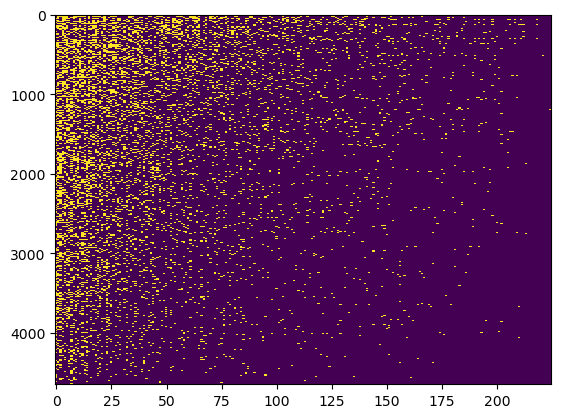

In [185]:
plt.imshow(M.loc[u.index, d.index], interpolation='none', aspect='auto')

ECI is the eigenvector associated with the second largest eigenvalue of the matrix 
$$\tilde{M} = D^{-1} M U^{-1} M^T $$

$$\tilde{M} = D^{-1} S$$

$$S_{cc'} = \sum_p \frac{M_{cp} M_{c'p}}{u_c}$$

Symmetricaly, PCI is the eigenvector associated with the second largest eigenvalue of the matrix 
$$\hat{M} = U^{-1} M^T D^{-1} M $$

In [186]:
def M_to_Mhat(M):
    # k_c = country . k_p = product. D = diversity, U = ubiquity

    k_c = M.sum(axis=0) # diversity
    k_p = M.sum(axis=1) # ubiquity
    D = np.diag(k_c)
    U = np.diag(k_p)

    S_tilde = (M.T).dot(np.linalg.inv(U)).dot(M)
    S_hat = (M).dot(np.linalg.inv(D)).dot(M.T)

    M_tilde = np.linalg.inv(D).dot(S_tilde)
    M_hat = np.linalg.inv(U).dot(S_hat)

    return M_hat, M_tilde


def Mtilde_to_complexity(M_tilde, M, type='eci'):
    # the PCI is the eigenvector associated with the second largest right eigenvalue of M_hat: M_hat * eci = lambda*eci
    # from the docs: a   eigvec[:,i] = eigval[i]        b   eigvec[:,i]
    eigenValues, eigenVectors = linalg.eig(M_tilde)

    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    # take second largest eigenvector
    pci = np.real(eigenVectors[:, 1])
    
    idx = pci.argsort()[::-1]
    if type == 'eci':
        pci_list = M.dropna(axis=1).columns[idx]
    elif type == 'pci':
        pci_list = M.dropna().index[idx]

    return pci, pci_list